In [1]:
from imutils.perspective import four_point_transform
from PIL import Image
import imutils
import cv2

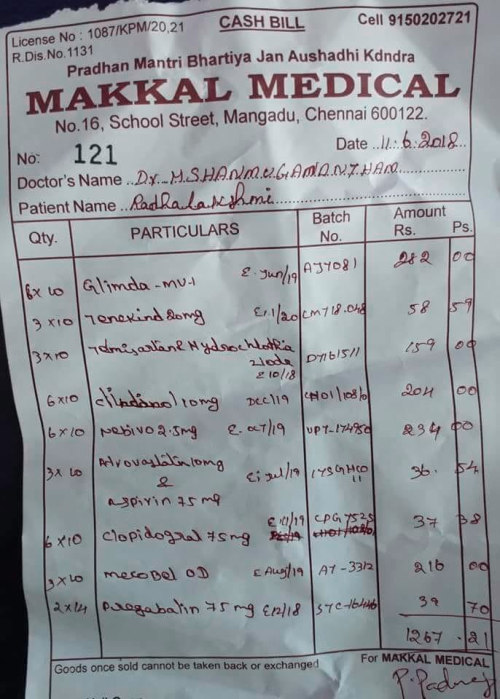

In [2]:
# load the input image from disk, resize it, and compute the ratio
# of the *new* width to the *old* width
orig = cv2.imread('pharma bill samples/1.jpeg')
image = orig.copy()
image = imutils.resize(image, width=500)
ratio = orig.shape[1] / float(image.shape[1])
Image.fromarray(image)

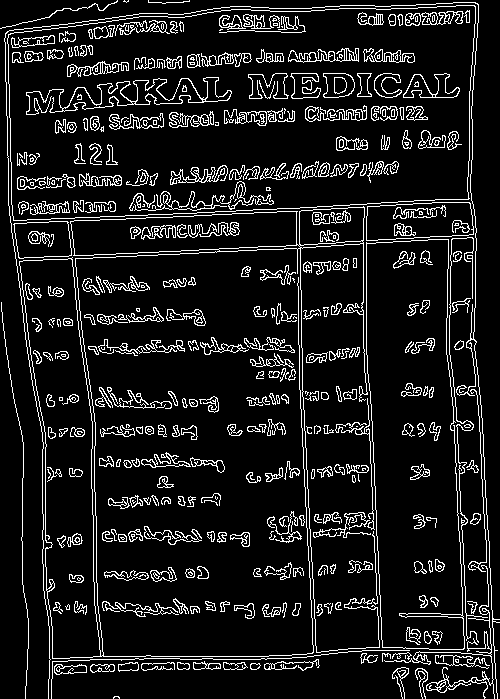

In [3]:
# convert the image to grayscale, blur it slightly, and then apply
# edge detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5,), 0)
edged = cv2.Canny(blurred, 75, 200)
Image.fromarray(edged)

In [4]:
# find contours in the edge map and sort them by size in descending
# order
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

In [5]:
# initialize a contour that corresponds to the receipt outline
receiptCnt = None
# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
	# if our approximated contour has four points, then we can
	# assume we have found the outline of the receipt
	if len(approx) == 4:
		receiptCnt = approx
		break
# if the receipt contour is empty then our script could not find the
# outline and we should be notified
if receiptCnt is None:
	raise Exception(("Could not find receipt outline. "
		"Try debugging your edge detection and contour steps."))

In [6]:
output = image.copy()
cv2.drawContours(output, [receiptCnt], -1, (0, 255, 0), 2)
cv2.imshow("Receipt Outline", output)
cv2.waitKey(0)
# apply a four-point perspective transform to the *original* image to
# obtain a top-down bird's-eye view of the receipt
receipt = four_point_transform(orig, receiptCnt.reshape(4, 2) * ratio)
# show transformed image
cv2.imshow("Receipt Transform", imutils.resize(receipt, width=500))
cv2.waitKey(0)


-1